In [ ]:
pip install opencv-python numpy rasterio sentinelhub matplotlib

In [9]:
import cv2 as opencv
from sentinelhub import SHConfig, MimeType, CRS, BBox, SentinelHubRequest, DataCollection, bbox_to_dimensions
import numpy as np
import matplotlib.pyplot as plt
import rasterio

[-0.85098039 -0.75686275 -0.70196078 ...  0.50588235  0.01960784
 -0.11372549]


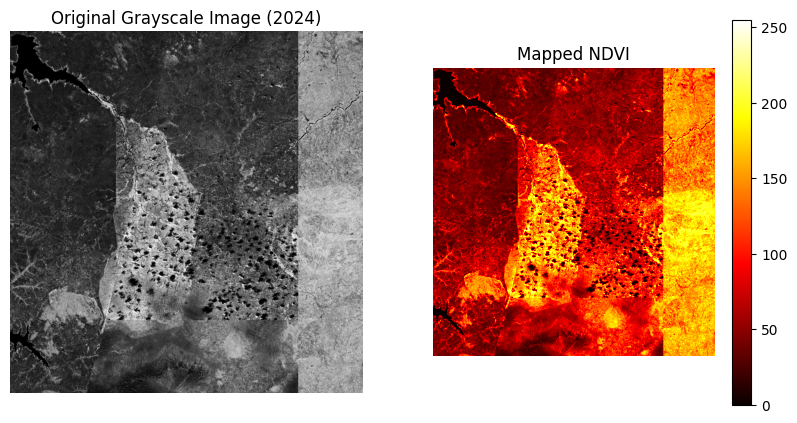

In [26]:

class imageBundle:
    def __init__(self, img, year, coords):
        self.img = img  # Assuming img is a grayscale image loaded with OpenCV
        self.year = year
        self.coords = coords

    def toNdvi(self):
        # Check if the image is valid
        if self.img is None:
            raise ValueError("No image data found.")

        # Normalize the grayscale image to a range [0, 1]
        gray_normalized = self.img.astype(float) / 255.0

        # Map normalized values to NDVI range [-1, 1]
        ndvi = gray_normalized * 2 - 1  # Scale from [0, 1] to [-1, 1]

        return ndvi  # Return NDVI values
    
    def returnNdvi(self):
        """Return a 1D array of NDVI values."""
        ndvi = self.toNdvi()  # Get the NDVI array
        ndvi_flat = ndvi.flatten()  # Flatten the NDVI array to 1D
        return ndvi_flat  # Return the flattened NDVI values
    


    def display(self):
        """Method to display the original image and NDVI."""
        ndvi_image = self.toNdvi()

        # Normalize NDVI for display purposes (to [0, 255])
        ndvi_display = opencv.normalize(ndvi_image, None, 0, 255, opencv.NORM_MINMAX).astype(np.uint8)

        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(self.img, cmap='gray')
        plt.title(f'Original Grayscale Image ({self.year})')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(ndvi_display, cmap='hot')
        plt.title('Mapped NDVI')
        plt.axis('off')

        plt.colorbar()
        plt.show()









  
    











    

Number of bands: 4


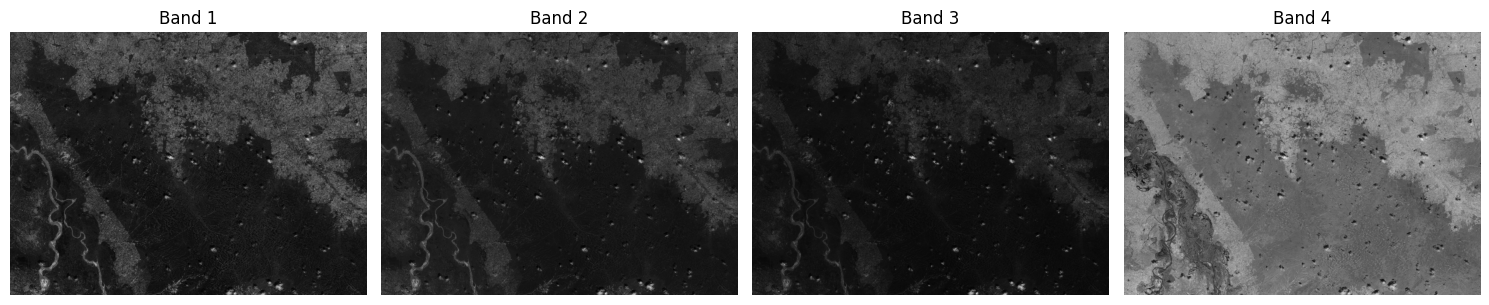

In [5]:
# tiff_path = "/Users/hassamkhan/Desktop/Datathon/IBMZ2024/images/sampleTIFF.tiff"
# with rasterio.open(tiff_path) as src:
#     # Read all bands
#     bands = src.read()  # This reads all bands in the TIFF file
#     num_bands = src.count
#     print(f"Number of bands: {num_bands}")

#     # Plot each band
#     fig, axes = plt.subplots(1, num_bands, figsize=(15, 5))
    
#     for i in range(num_bands):
#         ax = axes[i]
#         ax.imshow(bands[i, :, :], cmap='gray')
#         ax.set_title(f'Band {i+1}')
#         ax.axis('off')
    
#     plt.tight_layout()
#     plt.show()


Red band:  [[28 31 30 ... 45 27 28]
 [22 26 29 ... 24 18 24]
 [14 16 20 ... 11 15 21]
 ...
 [19 19 16 ... 23 22 19]
 [19 19 16 ... 22 19 20]
 [19 19 17 ... 20 20 22]]
NIR band:  [[48 51 52 ... 62 44 45]
 [41 46 49 ... 41 35 41]
 [30 35 39 ... 28 32 38]
 ...
 [22 22 21 ... 42 43 36]
 [22 22 21 ... 41 40 37]
 [22 22 22 ... 39 41 39]]


2024-10-19 11:41:04.972 Python[60246:6134208] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


: 